# Install Detectron2 Dependencies

In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.8/703.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.13.1+cu116 requires 

In [3]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=6e16584e23d65a30f056406d17472b8363c1633b946c8c7fa484493f53b16fe8
  Stored in directory: /root/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd73651e8af175fabbef943043b1cc
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=38f593b3b7460ab7078a5e9fa1070b36bfad3989ac0d7571058e8c9797bc4411
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2ee

In [4]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

# Import and Register Custom Detectron2 Data

In [1]:
!curl -L "https://app.roboflow.com/ds/BGOJswfXqh?key=Do4bMa3qv9" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/d52a1d651319031e2dadca61dabe46eb_jpg.rf.a95850d0360f883898eab4464a23007a.jpg  
 extracting: train/d52a1d651319031e2dadca61dabe46eb_jpg.rf.f26a3c98c6090823aa04386df4d40bbb.jpg  
 extracting: train/d537e3dacb74445729751d92316a6e43_jpg.rf.472215c4dd1b55dfa73ff90c680ed4ce.jpg  
 extracting: train/d537e3dacb74445729751d92316a6e43_jpg.rf.74db6ec35addec9920eec0b7f67abebd.jpg  
 extracting: train/d537e3dacb74445729751d92316a6e43_jpg.rf.97280c6719599203b4a42edaca01d812.jpg  
 extracting: train/d54a91d37b67fe95d737904c698ed617_jpg.rf.b86af900d345220461ad10bb4cf56b60.jpg  
 extracting: train/d54a91d37b67fe95d737904c698ed617_jpg.rf.bab5afc2a133f9b1c35d519369a09499.jpg  
 extracting: train/d54a91d37b67fe95d737904c698ed617_jpg.rf.c5e8b665d895664694c844304c2c0d9d.jpg  
 extracting: train/d5544adbca3b574aebb9f2397fb5576b_jpg.rf.149b9c778722ef319f22f82a6b6e37bb.jpg  
 extracting: train/d5544adbca3b574aebb9f2397fb5576b_jpg.rf.8ab44100

In [6]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")

WARNING [01/21 13:18:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/21 13:18:58 d2.data.datasets.coco]: Loaded 18882 images in COCO format from /content/train/_annotations.coco.json


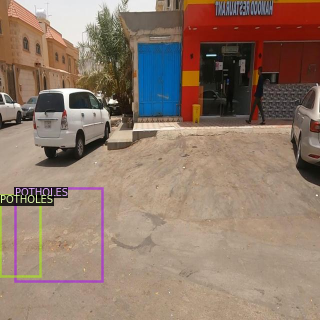

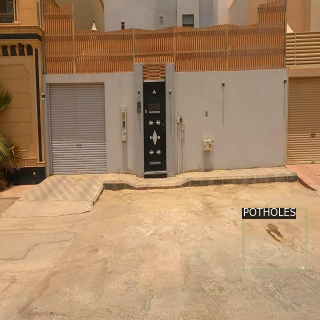

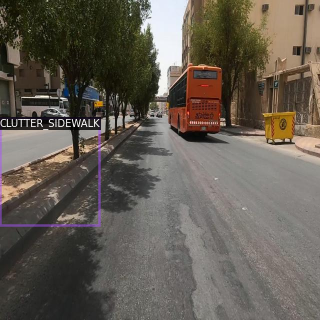

In [7]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Train Custom Detectron2 Detector

In [8]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [10]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 200
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/21 13:19:57 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:17, 24.1MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/21 13:20:21 d2.engine.train_loop]: Starting training from iteration 0
[01/21 13:20:57 d2.utils.events]:  eta: 0:05:30  iter: 19  total_loss: 1.933  loss_cls: 1.532  loss_box_reg: 0.001  loss_rpn_cls: 0.321  loss_rpn_loc: 0.025  time: 1.8032  data_time: 0.0348  lr: 0.000020  max_mem: 7647M
[01/21 13:21:34 d2.utils.events]:  eta: 0:04:54  iter: 39  total_loss: 1.442  loss_cls: 1.122  loss_box_reg: 0.000  loss_rpn_cls: 0.286  loss_rpn_loc: 0.023  time: 1.8310  data_time: 0.0116  lr: 0.000040  max_mem: 7647M
[01/21 13:22:13 d2.utils.events]:  eta: 0:04:22  iter: 59  total_loss: 1.028  loss_cls: 0.576  loss_box_reg: 0.009  loss_rpn_cls: 0.354  loss_rpn_loc: 0.030  time: 1.8768  data_time: 0.0112  lr: 0.000060  max_mem: 7647M
[01/21 13:22:53 d2.utils.events]:  eta: 0:03:50  iter: 79  total_loss: 0.786  loss_cls: 0.364  loss_box_reg: 0.037  loss_rpn_cls: 0.285  loss_rpn_loc: 0.023  time: 1.9054  data_time: 0.0107  lr: 0.000080  max_mem: 7647M
[01/21 13:23:31 d2.utils.events]:  eta: 0:03:1